In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
col=['sepal_length','sepal_width','petal_length','petal_width','type']
url="https://raw.githubusercontent.com/saireddyavs/machine-learning/master/iris.xlsx"
iris=pd.read_csv(url,names=col)

<h3> Let's understand the dataset </h3> 

<p> let us see how much size it has and shape of it </p>

In [6]:
print("First five rows")
print(iris.head())
print("*********")
print("columns",iris.columns)
print("*********")
print("shape:",iris.shape)
print("*********")
print("Size:",iris.size)
print("*********")
print("no of samples available for each type") 
print(iris["type"].value_counts())
print("*********")
print(iris.describe())

First five rows
   sepal_length  sepal_width  petal_length  petal_width         type
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
*********
columns Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type'], dtype='object')
*********
shape: (150, 5)
*********
Size: 750
*********
no of samples available for each type
type
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64
*********
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.3000

<p>Given that there are 50 data points in each class and that the distribution of data points within each class is equal, we can conlcude that Iris is a balanced dataset.</p>

<h3> Data set analysis </h3>
<h4> Analysis of one variable </h4>
<p>The simplest type of data analysis is called a univariate analysis. Uni means "one," thus your data only has one variable. It gathers data, summaries that data, and looks for patterns in the data; unlike regression, it doesn't deal with causes or relationships.</p>

<h4>Plots of distribution </h4>

<p>With regard to frequency, distribution charts are used to visually evaluate how the data points are distributed. Typically, the data points are divided into bins, and as more data points are included in a given group, the height of the bars that represent those groups rises. (Histogram) </p>

<p>* The Probability Density Function (PDF) measures the likelihood that the variable will have the value x. Kernel Density Estimate (KDE) is a method for estimating the PDF. It is a smoothed version of the histogram. The KDE curve's area beneath it is one.
* In this case, the bar's height indicates the proportion of data points that fall under the relevant group.

single-variable analysis I'm utilizing PDF, CDF graph, box-plot, and violin plot in this instance.

So let's split our data set into three sections as follows:
</p>



In [7]:
iris_setosa=iris.loc[iris["type"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["type"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["type"]=="Iris-versicolor"]

<p>Plotting each flower's individual histograms.</p>


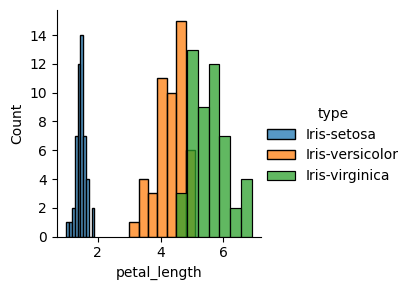

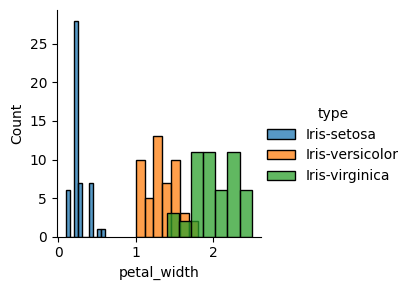

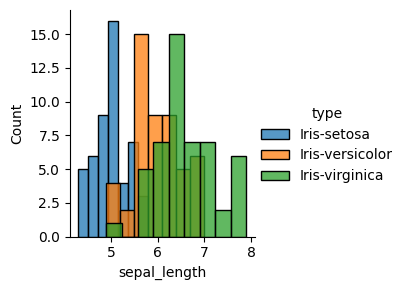

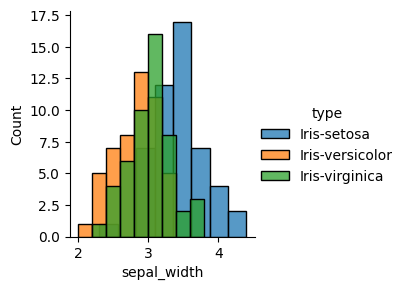

In [18]:
sns.FacetGrid(iris, hue="type", height=3).map(sns.histplot, "petal_length").add_legend()
sns.FacetGrid(iris, hue="type", height=3).map(sns.histplot, "petal_width").add_legend()
sns.FacetGrid(iris, hue="type", height=3).map(sns.histplot, "sepal_length").add_legend()
sns.FacetGrid(iris, hue="type", height=3).map(sns.histplot, "sepal_width").add_legend()
plt.show()



<p>
Based on the observations, it seems that using the feature "petal length" can effectively separate the "iris-setosa" species from the others. However, using "sepal length" and "sepal width" does not provide clear separation between the different flower types.

Additionally, it appears that the distribution of "iris-setosa" in the feature "petal width" is not well-defined. Therefore, it is concluded that "petal length" is the most useful feature for distinguishing "iris-setosa" from the other species.

To visualize the probability density function (PDF) and cumulative distribution function (CDF)</p>

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


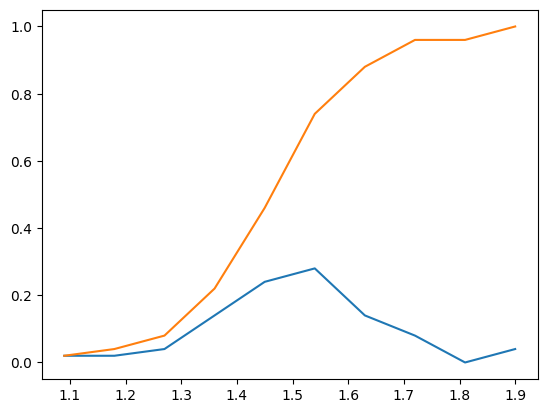

[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]


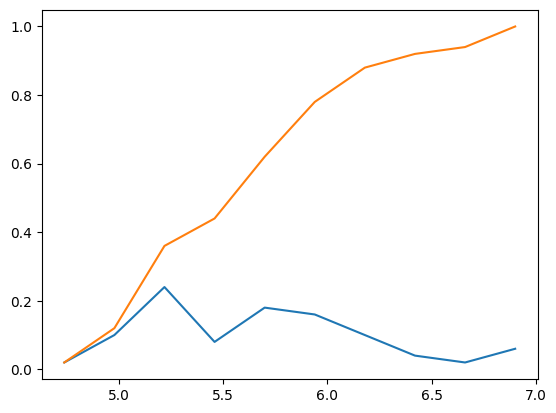

[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


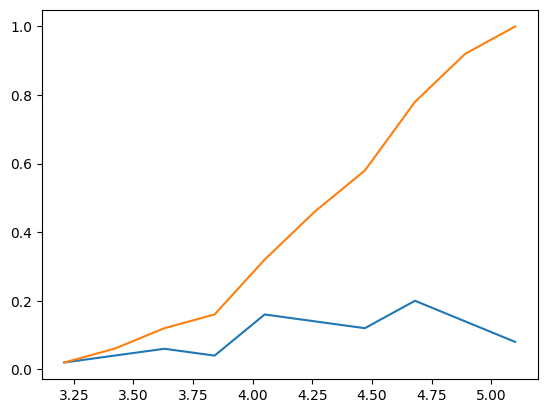

In [20]:
#for iris_setosa
counts,bin_edges=np.histogram(iris_setosa["petal_length"],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

#for iris_virginica
counts,bin_edges=np.histogram(iris_virginica["petal_length"],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

#for iris_versicolor
counts,bin_edges=np.histogram(iris_versicolor["petal_length"],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

<h3>Box PLot</h3>

<p>A boxplot provides a concise summary of the distribution of data using five key values: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. It helps identify outliers and their values, assess symmetry, measure data grouping, and determine any skewness in the data.</p>

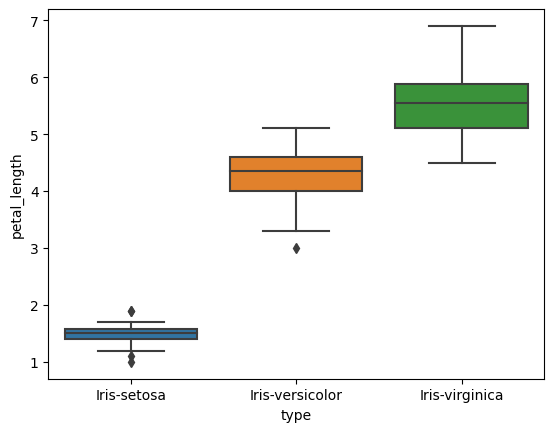

In [21]:
sns.boxplot(x="type",y="petal_length",data=iris)
plt.show()

<h3>Violin Plot</h3>

<p>
A violin plot is a type of visualization used to represent the distribution of numerical data for different variables. It provides more information than a box plot by displaying a rotated plot on each side, showing the density estimate on the y-axis. The resulting shape resembles a violin. Violin plots can reveal nuances in the data distribution that may not be easily noticeable in a box plot. However, box plots are more effective at highlighting outliers. Although violin plots are less popular, they offer richer information. 
    
    
    
In the context of the iris dataset, let's plot a violin plot to visualize the data.</p>


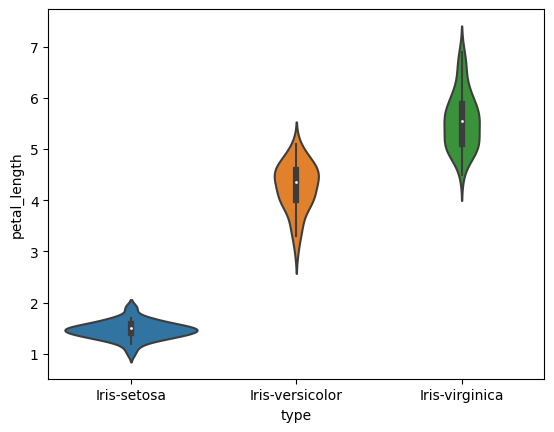

In [23]:
sns.violinplot(x="type",y="petal_length",data=iris)
plt.show()

<p>Violin plot=boxplot+ histogarm

squares are box plot and white dot indicates 50% percentile.</p>

<h1>Bivariate Analysis </h1>

<p>Bivariate analysis involves studying the relationship between two variables. </p>
 <h3>scatter plot </h3>
 <p>It is a type of visual representation used in bivariate analysis, where data points are plotted as dots on a two-dimensional graph. One variable is plotted along the x-axis, and the other variable is plotted along the y-axis. This plot helps visualize the relationship and patterns between the two variables.</p>

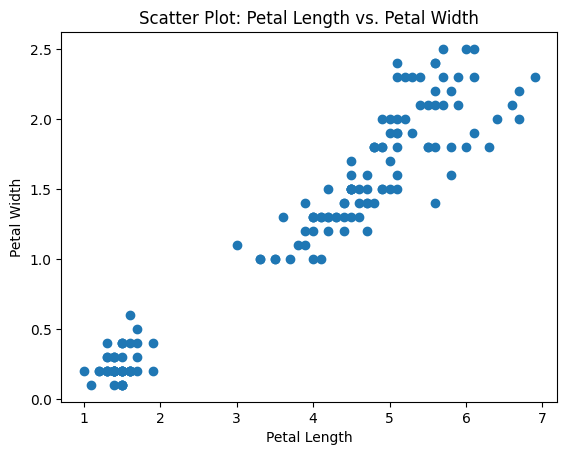

In [24]:


# Plotting the scatter plot
plt.scatter(iris["petal_length"], iris["petal_width"])

# Set the labels and title
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Scatter Plot: Petal Length vs. Petal Width")

# Display the plot
plt.show()


<h3>Pair Plot</h3>
<p>It is a concise and convenient way to visualize the relationships between multiple variables in a dataset. It provides a matrix of scatter plots, where each plot represents the relationship between two different features. It allows for a quick and comprehensive examination of the data by visualizing the interactions and patterns between variables. In the context of the iris dataset, a pair plot would show scatter plots for all possible combinations of the features in the dataset, providing insights into the relationships between them.</p>

C:\Users\Bigbyte\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


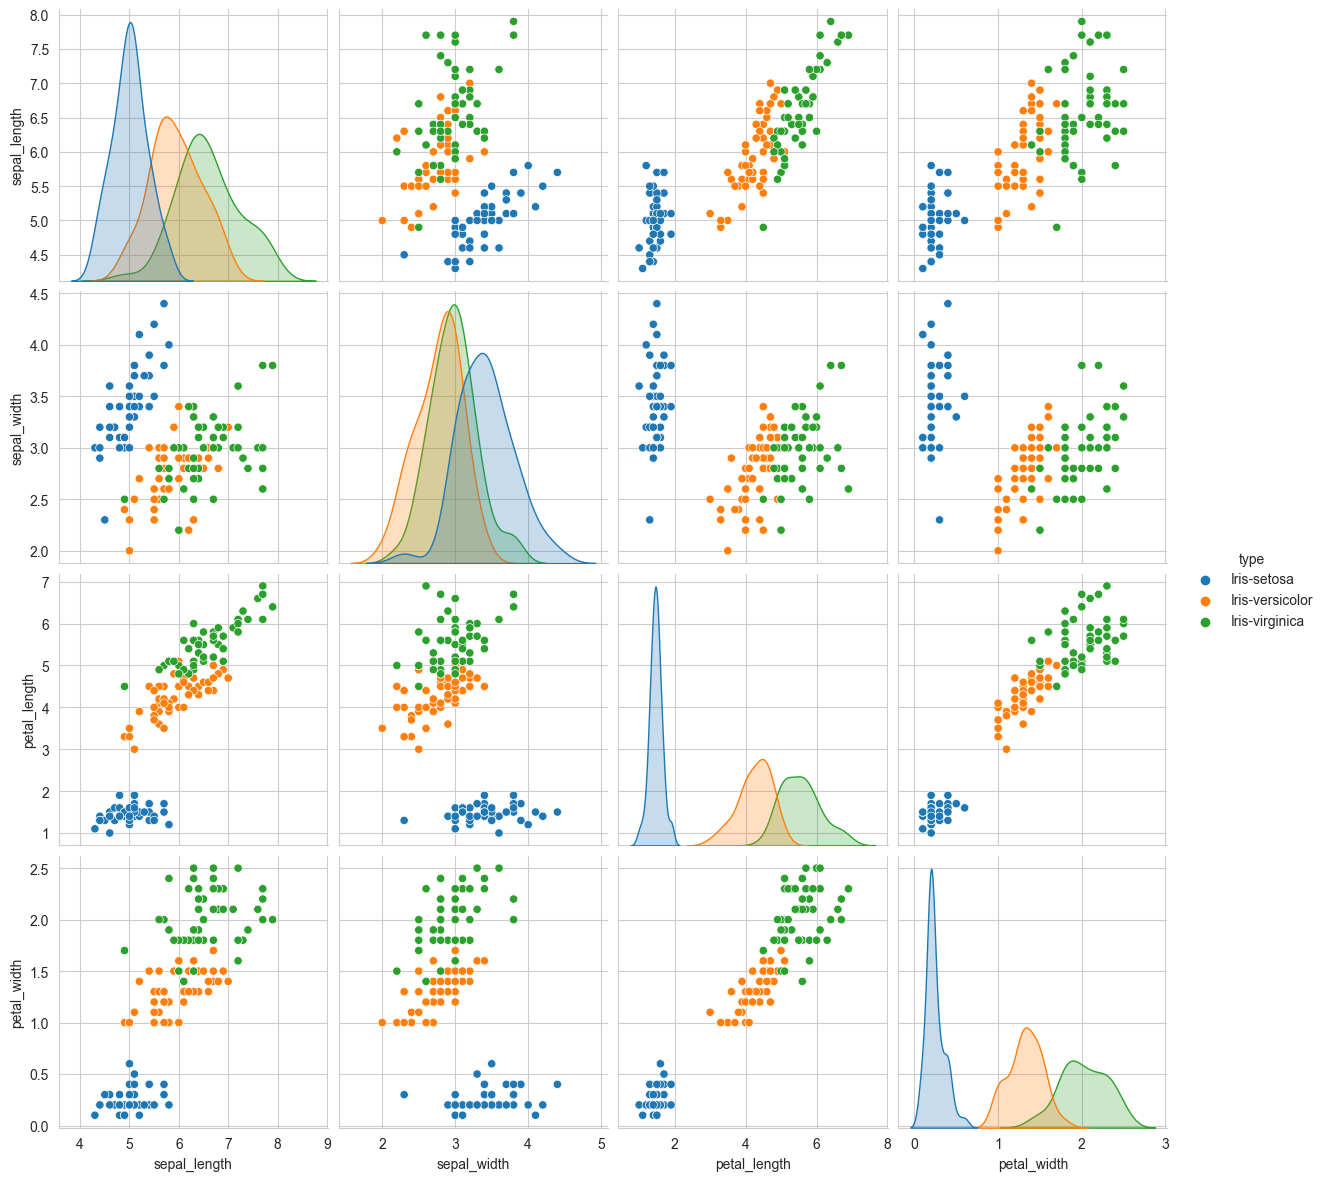

In [25]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="type",size=3);
plt.show()